In [1]:
import pandas as pd
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
db = pd.read_csv("cleaned solar data/kapala(2011-2019).csv")

In [3]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43754 entries, 0 to 43753
Data columns (total 9 columns):
ID                       43754 non-null int64
BT                       43726 non-null float64
Horizontal Irradiance    43754 non-null float64
SUN                      43753 non-null float64
BHI                      43749 non-null float64
PoA Irradiance 30        43751 non-null float64
PoA Irradiance 15        43752 non-null float64
PoA Irradiance 22.5      38611 non-null float64
Date_time                43754 non-null object
dtypes: float64(7), int64(1), object(1)
memory usage: 3.0+ MB


In [4]:
db.head()

,ID,BT,Horizontal Irradiance,SUN,BHI,PoA Irradiance 30,PoA Irradiance 15,PoA Irradiance 22.5,Date_time
0,101,12.94,0.000000,0.000,0.000000,0.000000,0.000000,NaN,2011-04-05 00:00:00
1,101,12.86,233.538889,0.417,233.538889,213.225000,223.297222,NaN,2011-04-05 10:00:00
2,101,12.93,785.388889,1.000,663.200000,715.361111,751.138889,NaN,2011-04-05 11:00:00
3,101,12.94,971.500000,0.983,648.100000,888.750000,930.277778,NaN,2011-04-05 12:00:00
4,101,12.94,776.583333,0.600,318.500000,713.416667,739.388889,NaN,2011-04-05 13:00:00


In [5]:
#db["Horizontal Irradiance"] = db["Diffuse Irradiance"] + db["BHI"]

In [6]:
db = db[["Date_time","Horizontal Irradiance","SUN","BHI","PoA Irradiance 30","PoA Irradiance 15","PoA Irradiance 22.5"]]
cleaned = db

In [7]:
cleaned.head()

,Date_time,Horizontal Irradiance,SUN,BHI,PoA Irradiance 30,PoA Irradiance 15,PoA Irradiance 22.5
0,2011-04-05 00:00:00,0.000000,0.000,0.000000,0.000000,0.000000,NaN
1,2011-04-05 10:00:00,233.538889,0.417,233.538889,213.225000,223.297222,NaN
2,2011-04-05 11:00:00,785.388889,1.000,663.200000,715.361111,751.138889,NaN
3,2011-04-05 12:00:00,971.500000,0.983,648.100000,888.750000,930.277778,NaN
4,2011-04-05 13:00:00,776.583333,0.600,318.500000,713.416667,739.388889,NaN


In [8]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43754 entries, 0 to 43753
Data columns (total 7 columns):
Date_time                43754 non-null object
Horizontal Irradiance    43754 non-null float64
SUN                      43753 non-null float64
BHI                      43749 non-null float64
PoA Irradiance 30        43751 non-null float64
PoA Irradiance 15        43752 non-null float64
PoA Irradiance 22.5      38611 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.3+ MB


In [9]:
cleaned.Date_time = pd.to_datetime(cleaned.Date_time)

In [10]:
cleaned = cleaned.set_index("Date_time")

In [11]:
#cleaned = cleaned.resample("H").mean()

In [12]:
cleaned

,Horizontal Irradiance,SUN,BHI,PoA Irradiance 30,PoA Irradiance 15,PoA Irradiance 22.5
Date_time,,,,,,
2011-04-05 00:00:00,0.000000,0.000,0.000000,0.000000,0.000000,NaN
2011-04-05 10:00:00,233.538889,0.417,233.538889,213.225000,223.297222,NaN
2011-04-05 11:00:00,785.388889,1.000,663.200000,715.361111,751.138889,NaN
2011-04-05 12:00:00,971.500000,0.983,648.100000,888.750000,930.277778,NaN
2011-04-05 13:00:00,776.583333,0.600,318.500000,713.416667,739.388889,NaN
2011-04-05 14:00:00,572.944444,0.367,240.700000,520.666667,535.777778,NaN
2011-04-05 15:00:00,760.694444,0.883,612.900000,669.722222,686.916667,NaN
2011-04-05 16:00:00,716.527778,1.000,708.000000,616.277778,628.583333,NaN
2011-04-05 17:00:00,474.916667,1.000,474.916667,394.416667,398.861111,NaN


In [13]:
#cleaned = cleaned.round(0).fillna(0).astype(int)

In [14]:
cleaned

,Horizontal Irradiance,SUN,BHI,PoA Irradiance 30,PoA Irradiance 15,PoA Irradiance 22.5
Date_time,,,,,,
2011-04-05 00:00:00,0.000000,0.000,0.000000,0.000000,0.000000,NaN
2011-04-05 10:00:00,233.538889,0.417,233.538889,213.225000,223.297222,NaN
2011-04-05 11:00:00,785.388889,1.000,663.200000,715.361111,751.138889,NaN
2011-04-05 12:00:00,971.500000,0.983,648.100000,888.750000,930.277778,NaN
2011-04-05 13:00:00,776.583333,0.600,318.500000,713.416667,739.388889,NaN
2011-04-05 14:00:00,572.944444,0.367,240.700000,520.666667,535.777778,NaN
2011-04-05 15:00:00,760.694444,0.883,612.900000,669.722222,686.916667,NaN
2011-04-05 16:00:00,716.527778,1.000,708.000000,616.277778,628.583333,NaN
2011-04-05 17:00:00,474.916667,1.000,474.916667,394.416667,398.861111,NaN


In [15]:
cleaned = cleaned.tz_localize("Africa/Kampala")


In [16]:
cleaned["GMT_time"] = [pd.to_datetime(x).tz_convert("GMT") for x in cleaned.index]

In [17]:
cleaned

,Horizontal Irradiance,SUN,BHI,PoA Irradiance 30,PoA Irradiance 15,PoA Irradiance 22.5,GMT_time
Date_time,,,,,,,
2011-04-05 00:00:00+03:00,0.000000,0.000,0.000000,0.000000,0.000000,NaN,2011-04-04 21:00:00+00:00
2011-04-05 10:00:00+03:00,233.538889,0.417,233.538889,213.225000,223.297222,NaN,2011-04-05 07:00:00+00:00
2011-04-05 11:00:00+03:00,785.388889,1.000,663.200000,715.361111,751.138889,NaN,2011-04-05 08:00:00+00:00
2011-04-05 12:00:00+03:00,971.500000,0.983,648.100000,888.750000,930.277778,NaN,2011-04-05 09:00:00+00:00
2011-04-05 13:00:00+03:00,776.583333,0.600,318.500000,713.416667,739.388889,NaN,2011-04-05 10:00:00+00:00
2011-04-05 14:00:00+03:00,572.944444,0.367,240.700000,520.666667,535.777778,NaN,2011-04-05 11:00:00+00:00
2011-04-05 15:00:00+03:00,760.694444,0.883,612.900000,669.722222,686.916667,NaN,2011-04-05 12:00:00+00:00
2011-04-05 16:00:00+03:00,716.527778,1.000,708.000000,616.277778,628.583333,NaN,2011-04-05 13:00:00+00:00
2011-04-05 17:00:00+03:00,474.916667,1.000,474.916667,394.416667,398.861111,NaN,2011-04-05 14:00:00+00:00


In [18]:
longitude = 32.5657
latitude = 0.3370
surtilt = 30
surazim = 0
sc = 1367


def to_doy(datetime):
    """this function recieves pandas datetime index with GMT timezone aware 
    returns: day of year"""
    try:
        dt = datetime.tz_convert("Africa/Kampala") # timezone of the region your in
        nor_yr = np.array([31,28,31,30,31,30,31,31,30,31,30,31])
        lep_yr = np.array([31,29,31,30,31,30,31,31,30,31,30,31])
        if dt.month ==1:
            doy = dt.day
        elif dt.month != 1 and dt.year%4 !=0:
            doy = dt.day + nor_yr[:dt.month-1].sum()
        else:
            doy = dt.day + lep_yr[:dt.month - 1].sum()

        return doy
    except Exception as e:
        return e


def declination_cooper69(datetime):
    """this functions finds
    solar declination in degrees using cooper formular 
    returns: declination """
    try:
        DOY = to_doy(datetime)
        radians = np.radians((360/365)*(DOY + 284))
        declination = 23.45*np.sin(radians)
        return declination
    except Exception as e:
        return e


def day_angle(date_time):
    """This function calculates simple day angle in degrees
     returns: day angle"""
    try:
        DOY = to_doy(date_time)
        return (360/365)*(DOY-1)
    except Exception as e:
        return e


def equation_of_time_pvcdrom(datetime):
    """this function computes equation of time
    returns: time in minutes"""
    try:
        DOY = to_doy(datetime)
        B_radians = np.radians((360/365)*(DOY-81))

        E = 9.87*np.sin(2*B_radians) - 7.53*np.cos(B_radians) - 1.5*np.sin(B_radians)

        return E
    except Exception as e:
        return e


def solar_time(std_datetime_GMT):
    """This function computes solar time using
    GMT stardard time and prime green which meridan as a reference
    returns: solar time in hours"""

    try:
        global longitude
        equation_of_time = equation_of_time_pvcdrom(std_datetime_GMT.tz_convert("Africa/Kampala"))
        tm = std_datetime_GMT
        tm_hr = tm.hour + tm.minute/60

        solartime = tm_hr + (equation_of_time + 4*longitude)/60

        return solartime
    except Exception as e:
        return e

def hour_angle(sdt_datetime_GMT):
    """Hour angle and zero at solar noon
    std_GMT_time: str
    local standard time  in GMT

    hour_anlge:numeric
       hour_angle in degrees"""

    try:
        sol_time = solar_time(sdt_datetime_GMT)

        hr_angle = 15*(sol_time-12)

        return hr_angle
    except Exception as e:
        return e


def angle_of_elevation(sdt_datetime_GMT):
    """This function calculates angle of incidence
    std_GMT_time:str
      standard time in GMT
    angle_of_elevation:numeric
     angle of incidence in degrees"""

    try:
        global latitude
        hr_angle = hour_angle(sdt_datetime_GMT)
        decli = declination_cooper69(sdt_datetime_GMT)

        aoe = np.arcsin(np.sin(np.radians(decli))*np.sin(np.radians(latitude)) + np.cos(np.radians(decli))*np.cos(np.radians(latitude))*np.cos(np.radians(hr_angle)))

        aoe_deg = np.degrees(aoe)
        return aoe_deg

    except Exception as e:
        return e


def solar_azimuth(sdt_datetime_GMT):
    """This function calculates solar azimuth
      std_GMT_time:str
        standard time in GMT
      angle of azimuth:numeric
        angle of azimuth in degrees"""
    try:
        global latitude
        ofe = angle_of_elevation(sdt_datetime_GMT)
        decli = declination_cooper69(sdt_datetime_GMT)
        num = np.sin(np.radians(ofe))*np.sin(np.radians(latitude)) - np.sin(np.radians(decli))
        den = np.cos(np.radians(ofe))*np.cos(np.radians(latitude))

        sol_az = np.arccos(num/den)
        sol_az_deg = np.degrees(sol_az)
        return sol_az_deg
    except Exception as e:
        return e


def angle_of_incidence(sdt_datetime_GMT):
    """This function calculates angle of incidence
     basing on stadard time GMT and computes angle of incidence """
    try:
        global surtilt
        global surazim
        hourangle = hour_angle(sdt_datetime_GMT)
        declination = declination_cooper69(sdt_datetime_GMT)
        aoi = np.arccos(np.sin(np.radians(declination))*np.sin(np.radians(latitude))*np.cos(np.radians(surtilt)) - np.sin(np.radians(declination))*np.cos(np.radians(latitude))*np.sin(np.radians(surtilt))*np.cos(np.radians(surazim)) + np.cos(np.radians(declination))*np.cos(np.radians(latitude))*np.cos(np.radians(surtilt))*np.cos(np.radians(hourangle)) + np.cos(np.radians(declination))*np.sin(np.radians(latitude))*np.sin(np.radians(surtilt))*np.cos(np.radians(surazim))*np.cos(np.radians(hourangle)) + np.cos(np.radians(declination))*np.sin(np.radians(surtilt))*np.sin(np.radians(hourangle))*np.sin(np.radians(surazim)))
        aoi_deg = np.degrees(aoi)
        return aoi_deg
    except Exception as e:
        return e


def extra_irr_h(std_datetime_GMT):

    """This function calculates extraterrestrial irradiance
    on horizontal plane using different methods like spencer, asce and duffie_beckman models
    DOY:numeric
     Day of the year
    method:str
     "spencer","asce","duffie_and_beckman"
    Solar constant:numeric
     default 1367
    Angle_of_elev:numereic
     angle ofelevation in degrees
     retruns: array
     """

    try:
        global sc
        DOY = to_doy(std_datetime_GMT)
        B_radian = np.radians(day_angle(std_datetime_GMT))
        aoe_radians = np.radians(angle_of_elevation(std_datetime_GMT))

        E_spencer = 1.00011 + 0.034221 * np.cos(B_radian) + 0.00128 * np.sin(B_radian) + 0.000719 * np.cos(2 * B_radian) + 0.000077 * np.sin(2 * B_radian)

        E_asce = 1 + 0.033 * np.cos(B_radian)

        E_duffie_and_beckman = 1 + 0.033*np.cos(np.radians((360/365)*DOY))

        return np.array([x * np.sin(aoe_radians)*sc for x in [E_spencer, E_asce, E_duffie_and_beckman]])
    except Exception as e:
        return e

def extra_irr(std_datetime_GMT):

    """This function calculates extraterrestrial irradiance
    using different methods
    DOY:numeric
     Day of the year
    method:str
     "spencer","asce","duffie_and_beckman"
    Solar constant:numeric
     default 1367
    Angle_of_elev:numereic
     angle ofelevation in degrees"""

    try:
        global sc
        DOY = to_doy(std_datetime_GMT)
        B_radian = np.radians(day_angle(std_datetime_GMT))
        aoe_radians = np.radians(angle_of_elevation(std_datetime_GMT))

        E_spencer = 1.00011 + 0.034221 * np.cos(B_radian) + 0.00128 * np.sin(B_radian) + 0.000719 * np.cos(2 * B_radian) + 0.000077 * np.sin(2 * B_radian)

        E_asce = 1 + 0.033 * np.cos(B_radian)

        E_duffie_and_beckman = 1 + 0.033*np.cos(np.radians((360/365)*DOY))

        return np.array([x*sc for x in [E_spencer, E_asce, E_duffie_and_beckman]])
    except Exception as e:
        return e

def erbs(std_GMT_time,GHI):
    """this function calculates beam horizontal irradiance
    and diffuse horrizontal iirradiace for three clear sky models using
    erbs model"""

    Extr = std_GMT_time.apply(extra_irr_h)
    kt =GHI/Extr
    kt = np.stack(kt.values)
    kt = np.maximum(kt,0)
    phi = np.where(kt <= 0.22, 1-0.09*kt, np.where((kt > 0.22) & (kt <= 0.8), 0.9511-0.1604*kt + 4.388*kt**2 - 16.638*kt**3 + 12.336*kt**4,0.165))
    GHI = GHI[:,np.newaxis]
    BHI = GHI*(1-phi)
    DHI = GHI - BHI
    return BHI

def orgil_hollands(std_GMT_time, GHI):
    """this function calculates beam horizontal irradaince and diffuse irradaince
    using orgill and hollands model using clear sky models as input"""
    Extr = std_GMT_time.apply(extra_irr_h)
    kt = GHI / Extr
    kt = np.stack(kt.values)
    kt = np.maximum(kt,0)
    phi = np.where(kt < 0.35,1-0.249*kt,np.where((kt >= 0.35) & (kt <= 0.75),1.577-1.84*kt,0.177))
    GHI = GHI[:,np.newaxis]
    BHI = GHI * (1 - phi)
    DHI = GHI - BHI
    return BHI

def bolands(std_GMT_time, GHI):
    """this function evalutes beam horizontal irradaince and diffuse irradiance
    """
    Extr = std_GMT_time.apply(extra_irr_h)
    kt = GHI / Extr
    kt = np.stack(kt.values)
    kt = np.where(kt<0,0.587,kt)
    den = 1 + np.exp(7.997*(kt-0.587))
    phi = 1/den
    GHI = GHI[:,np.newaxis]
    BHI = GHI * (1 - phi)
    DHI = GHI - BHI
    return BHI

# this is the model i developed using local datasets without
# partitioning it 

def noor_diffuse4(std_GMT_time, GHI):
    Extr = std_GMT_time.apply(extra_irr_h)
    kt = GHI / Extr
    kt = np.stack(kt.values)
    kt = np.maximum(kt,0)
    phi = np.where((kt>=0) & (kt <= 1),-6.40971573*kt**4 + 17.32080925*kt**3 + -15.29575829*kt**2 + 4.53944271*kt + 0.252237,np.nan)
    GHI = GHI[:,np.newaxis]
    BHI = GHI * (1 - phi)
    return BHI
# this is the model i developed using local datasets but partioned

def noor_diffuse(std_GMT_time,GHI):
    Extr = std_GMT_time.apply(extra_irr_h)
    kt = GHI / Extr
    kt = np.stack(kt.values)
    kt = np.maximum(kt,0)
    phi = np.where( kt < 0.2,0.09253534928937057+3.27719669e+01*kt + -6.69912075e+02*kt**2 + 6.57869326e+03*kt**3 + -3.00603914e+04*kt**4 + 5.15852035e+04*kt**5,np.where((kt >=0.2) & (kt < 0.8), 0.57780607 + 1.30748683*kt + -4.75465657*kt**2 + 3.43032779*kt**3,np.where((kt >= 0.8) & (kt <= 1),0.8532920137087421 + -1.64520004*kt +  1.22166737*kt**2,np.nan)))
    GHI = GHI[:,np.newaxis]
    BHI = GHI * (1 - phi)
    return BHI

def poa_b(std_GMT_time, BHI):
    """this function calculates direct  irradiance on
     inclined plane"""
    aoi = np.stack(std_GMT_time.apply(angle_of_incidence).values)
    aoi_radians = np.radians(aoi)
    aoe_radians = np.radians(std_GMT_time.apply(angle_of_elevation))
    if aoi_radians.ndim ==2:
        aoe_radians = aoe_radians[:,np.newaxis]
    POA_b = BHI*(np.cos(aoi_radians)/np.sin(aoe_radians))
    return np.maximum(POA_b,0)
    


def lie_jordan(DHI):
    """this function calculates diffuse irradiance on 
    tilt collector from diffuse horrizontal irradiance"""
    global surtilt
    poa_d = 0.5*DHI*(1+ np.cos(np.radians(surtilt)))
    return poa_d

def ground_reflection(ghi):
    """this function computes irradiance from reflected irradiance"""
    global surtilt
    albedo = 0.2
    if type(ghi) == np.ndarray and not type(surtilt)==int:
        if surtilt.ndim ==2:
            reflect_irrad = [GHi *albedo* (1 - np.cos(np.radians(surtilt))) * 0.5 for GHI in ghi.ravel()]
            return reflect_irrad
    reflect_irrad = ghi * albedo * (1 - np.cos(np.radians(surtilt))) * 0.5
    return reflect_irrad

def hay_davies(std_GMT_time,BHI, GHI,G_ext):
    """This function  calculates beam horinzontal
    irradiance using hay and davies"""
    global surtilt
    try:
        DHI = GHI - BHI
        f_hay = BHI/G_ext
        f_hay = f_hay.fillna(0) # filling na as resuly of 0/0
        aoi_radians = np.radians(std_GMT_time.apply(angle_of_incidence))
        aoe_radians = np.radians(std_GMT_time.apply(angle_of_elevation))

        poa_d = DHI*(f_hay*(np.cos(aoi_radians)/np.sin(aoe_radians)) + (0.5*(1+np.cos(surtilt)))*(1-f_hay))
        return np.maximum(poa_d,0)
    except ZeroDivisionError:
        return 0
           

def perez(std_GMT_time,BHI,GHI,G_ext):
    """this function calaculates diffuse componet
    on tilted collector"""
    global surtilt
    try:
        DHI = GHI - BHI
        arr = np.array([[-0.008,0.588,-0.062,-0.060,0.072,-0.022],[0.130,0.683,-0.151,-0.019,0.066,-0.029],[0.330,0.487,-0.221,0.055,-0.064,-0.026],[0.568,0.187,-0.295,0.109,-0.152,-0.014],[0.873,-0.392,-0.362,0.226,-0.462,0.001],[1.132,-1.237,-0.412,0.288,-0.823,0.056],[1.060,-1.600,-0.359,0.264,-1.127,0.131],[0.678,-0.327,-0.250,0.156,-1.377,0.251]])
        labels = pd.cut([1.060, 1.20, 1.4, 1.8, 2.5, 3.0, 5, 7],
                    [1.000, 1.065, 1.230, 1.500, 1.950, 2.800, 4.500, 6.200, np.inf], right=False)
        df = pd.DataFrame(arr, index=labels.categories, columns=["F11", "F12", "F13", "F21", "F22", "F23"])

        aoe_radians = np.radians(std_GMT_time.apply(angle_of_elevation))
        zenith_radians = np.pi - aoe_radians
        
        aoi = np.stack(std_GMT_time.apply(angle_of_incidence).values)
        aoi_radians = np.radians(aoi)

        air_mass = 1/np.sin(aoe_radians)
        G_ext = G_ext/np.sin(aoe_radians)
        delta = air_mass*DHI/G_ext
        delta = delta.fillna(0) #nan generated from 0/0
        dni = BHI/np.sin(aoe_radians)
        eps = ((DHI + dni)/DHI + 1.041 * zenith_radians**3)/(1 + 1.041 * zenith_radians**3)
        eps = eps.fillna(0) # nan generated from 0/0
        coeficients = []
        for value in eps.values:
            if value == 0:
                coeficients.append([0]*6) 
            else:
                for x,y in enumerate(df.index):
                    if value in y:
                        coef = df.iloc[x,:]
                        coeficients.append(coef)
                        break
                else:
                    coeficients.append([np.nan]*6)
        coef = np.stack(coeficients)
        F1 = np.maximum(0,(coef[:,0] + coef[:,1] * delta + coef[:,2] * zenith_radians))
        F2 = coef[:,3] + coef[:,4] * delta + zenith_radians * coef[:,5]

        a = np.maximum(0,np.cos(aoi_radians))
        b = np.maximum(np.cos(np.radians(85)), np.cos(zenith_radians))
        if a.ndim ==2:
            F1 = F1[:,np.newaxis]
            F2 = F2[:,np.newaxis]
            b = b[:,np.newaxis]
            DHI = DHI[:,np.newaxis]
        poa_d = DHI * (0.5 * (1 + np.cos(np.radians(surtilt))) * (1 - F1) + F1 * (a/b) + F2 * np.sin(np.radians(surtilt)))
        return np.maximum(poa_d,0)
    except ZeroDivisionError:
        return 0


def rmbd(measured_poa, modeled_poa):
    """This function calaculates Relative mean bias deviation """
    evalute = pd.DataFrame({"measured_poa":measured_poa.values,"modeled_poa":modeled_poa.values})
    
    evalute= evalute[~evalute.isin([np.inf,np.nan]).any(1)]
    evalute = evalute[evalute.measured_poa > 0]
    rela_mbd = (evalute.measured_poa - evalute.modeled_poa).mean()/evalute.measured_poa.mean()

    return rela_mbd * 100


def rmsd(measured_poa, modeled_poa):
    """This function calculates root mean square deviation"""
    evalute = pd.DataFrame({"measured_poa":measured_poa.values,"modeled_poa":modeled_poa.values},index=measured_poa.index)
    
    evalute= evalute[~evalute.isin([np.inf,np.nan]).any(1)]
    evalute = evalute[evalute.measured_poa > 0]
    error = np.sqrt(((evalute.measured_poa - evalute.modeled_poa)**2).mean())/evalute.measured_poa.mean()
    return error * 100

In [19]:
def filter1(x):
    if x < 0:
        return 0
    else:
        return x

In [20]:
for x,y in enumerate(["Ext_Spencer","Ext_ASCE","Ext_Duffie_beckman"]):
    cleaned[y]=cleaned["GMT_time"].apply(extra_irr_h).apply(lambda z: filter1(z[x]))
    cleaned[y] = cleaned[y].round(0).astype(int)

In [21]:
cleaned

,Horizontal Irradiance,SUN,BHI,PoA Irradiance 30,PoA Irradiance 15,PoA Irradiance 22.5,GMT_time,Ext_Spencer,Ext_ASCE,Ext_Duffie_beckman
Date_time,,,,,,,,,,
2011-04-05 00:00:00+03:00,0.000000,0.000,0.000000,0.000000,0.000000,NaN,2011-04-04 21:00:00+00:00,0,0,0
2011-04-05 10:00:00+03:00,233.538889,0.417,233.538889,213.225000,223.297222,NaN,2011-04-05 07:00:00+00:00,991,991,990
2011-04-05 11:00:00+03:00,785.388889,1.000,663.200000,715.361111,751.138889,NaN,2011-04-05 08:00:00+00:00,1199,1198,1197
2011-04-05 12:00:00+03:00,971.500000,0.983,648.100000,888.750000,930.277778,NaN,2011-04-05 09:00:00+00:00,1324,1323,1322
2011-04-05 13:00:00+03:00,776.583333,0.600,318.500000,713.416667,739.388889,NaN,2011-04-05 10:00:00+00:00,1359,1358,1358
2011-04-05 14:00:00+03:00,572.944444,0.367,240.700000,520.666667,535.777778,NaN,2011-04-05 11:00:00+00:00,1302,1301,1300
2011-04-05 15:00:00+03:00,760.694444,0.883,612.900000,669.722222,686.916667,NaN,2011-04-05 12:00:00+00:00,1156,1155,1155
2011-04-05 16:00:00+03:00,716.527778,1.000,708.000000,616.277778,628.583333,NaN,2011-04-05 13:00:00+00:00,931,931,930
2011-04-05 17:00:00+03:00,474.916667,1.000,474.916667,394.416667,398.861111,NaN,2011-04-05 14:00:00+00:00,643,643,642


In [23]:
for func_name in ["noor_diffuse",'noor_diffuse4',"erbs","orgil_hollands","bolands"]:
    Beam_array= eval(func_name)(cleaned["GMT_time"],cleaned["Horizontal Irradiance"])
    cleaned["Ext_Spencer_"+func_name+"_BHI"],cleaned["Ext_ASCE_"+func_name+"_BHI"],cleaned["Ext_Duffie_beckman_"+func_name+"_BHI"] = Beam_array[:,0],Beam_array[:,1],Beam_array[:,2] 

In [24]:
cleaned

,Horizontal Irradiance,SUN,BHI,PoA Irradiance 30,PoA Irradiance 15,PoA Irradiance 22.5,GMT_time,Ext_Spencer,Ext_ASCE,Ext_Duffie_beckman,...,Ext_Duffie_beckman_noor_diffuse4_BHI,Ext_Spencer_erbs_BHI,Ext_ASCE_erbs_BHI,Ext_Duffie_beckman_erbs_BHI,Ext_Spencer_orgil_hollands_BHI,Ext_ASCE_orgil_hollands_BHI,Ext_Duffie_beckman_orgil_hollands_BHI,Ext_Spencer_bolands_BHI,Ext_ASCE_bolands_BHI,Ext_Duffie_beckman_bolands_BHI
Date_time,,,,,,,,,,,,,,,,,,,,,
2011-04-05 00:00:00+03:00,0.000000,0.000,0.000000,0.000000,0.000000,NaN,2011-04-04 21:00:00+00:00,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-04-05 10:00:00+03:00,233.538889,0.417,233.538889,213.225000,223.297222,NaN,2011-04-05 07:00:00+00:00,991,991,990,...,74.863398,5.299053,5.306361,5.313218,13.697838,13.706175,13.713966,13.255519,13.269862,13.283277
2011-04-05 11:00:00+03:00,785.388889,1.000,663.200000,715.361111,751.138889,NaN,2011-04-05 08:00:00+00:00,1199,1198,1197,...,510.164058,531.591714,532.204715,532.776697,493.807938,494.384342,494.922915,497.342418,497.923985,498.466934
2011-04-05 12:00:00+03:00,971.500000,0.983,648.100000,888.750000,930.277778,NaN,2011-04-05 09:00:00+00:00,1324,1323,1322,...,648.515757,778.305599,778.781806,779.224082,751.095896,751.894269,752.640243,742.042832,742.668222,743.251499
2011-04-05 13:00:00+03:00,776.583333,0.600,318.500000,713.416667,739.388889,NaN,2011-04-05 10:00:00+00:00,1359,1358,1358,...,466.185092,385.706424,386.310525,386.874970,368.277254,368.774158,369.238449,363.977989,364.515829,365.018452
2011-04-05 14:00:00+03:00,572.944444,0.367,240.700000,520.666667,535.777778,NaN,2011-04-05 11:00:00+00:00,1302,1301,1300,...,273.322999,128.899826,129.169953,129.422590,133.322257,133.604629,133.868469,135.173269,135.394625,135.601678
2011-04-05 15:00:00+03:00,760.694444,0.883,612.900000,669.722222,686.916667,NaN,2011-04-05 12:00:00+00:00,1156,1155,1155,...,494.952317,518.923974,519.514289,520.065063,482.102601,482.663208,483.187020,485.550479,486.112754,486.637673
2011-04-05 16:00:00+03:00,716.527778,1.000,708.000000,616.277778,628.583333,NaN,2011-04-05 13:00:00+00:00,931,931,930,...,477.861748,594.555758,594.716069,594.863067,589.702361,589.702361,589.702361,581.300052,581.710415,582.092981
2011-04-05 17:00:00+03:00,474.916667,1.000,474.916667,394.416667,398.861111,NaN,2011-04-05 14:00:00+00:00,643,643,642,...,317.126390,382.786710,383.005807,383.209153,371.165726,371.558440,371.925380,365.847616,366.149286,366.430625


In [25]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43754 entries, 2011-04-05 00:00:00+03:00 to 2019-01-16 11:00:00+03:00
Data columns (total 25 columns):
Horizontal Irradiance                    43754 non-null float64
SUN                                      43753 non-null float64
BHI                                      43749 non-null float64
PoA Irradiance 30                        43751 non-null float64
PoA Irradiance 15                        43752 non-null float64
PoA Irradiance 22.5                      38611 non-null float64
GMT_time                                 43754 non-null datetime64[ns, GMT]
Ext_Spencer                              43754 non-null int32
Ext_ASCE                                 43754 non-null int32
Ext_Duffie_beckman                       43754 non-null int32
Ext_Spencer_noor_diffuse_BHI             42952 non-null float64
Ext_ASCE_noor_diffuse_BHI                42951 non-null float64
Ext_Duffie_beckman_noor_diffuse_BHI      42951 non-null float64
Ext_Sp

In [26]:

mbd_error = {}
rmsd_error = {}

In [27]:
cleaned.columns

Index(['Horizontal Irradiance', 'SUN', 'BHI', 'PoA Irradiance 30',
       'PoA Irradiance 15', 'PoA Irradiance 22.5', 'GMT_time', 'Ext_Spencer',
       'Ext_ASCE', 'Ext_Duffie_beckman', 'Ext_Spencer_noor_diffuse_BHI',
       'Ext_ASCE_noor_diffuse_BHI', 'Ext_Duffie_beckman_noor_diffuse_BHI',
       'Ext_Spencer_noor_diffuse4_BHI', 'Ext_ASCE_noor_diffuse4_BHI',
       'Ext_Duffie_beckman_noor_diffuse4_BHI', 'Ext_Spencer_erbs_BHI',
       'Ext_ASCE_erbs_BHI', 'Ext_Duffie_beckman_erbs_BHI',
       'Ext_Spencer_orgil_hollands_BHI', 'Ext_ASCE_orgil_hollands_BHI',
       'Ext_Duffie_beckman_orgil_hollands_BHI', 'Ext_Spencer_bolands_BHI',
       'Ext_ASCE_bolands_BHI', 'Ext_Duffie_beckman_bolands_BHI'],
      dtype='object')

In [28]:
bhi_models =  ['Ext_Spencer_noor_diffuse_BHI',
       'Ext_ASCE_noor_diffuse_BHI', 'Ext_Duffie_beckman_noor_diffuse_BHI',
       'Ext_Spencer_noor_diffuse4_BHI', 'Ext_ASCE_noor_diffuse4_BHI',
       'Ext_Duffie_beckman_noor_diffuse4_BHI', 'Ext_Spencer_erbs_BHI',
       'Ext_ASCE_erbs_BHI', 'Ext_Duffie_beckman_erbs_BHI',
       'Ext_Spencer_orgil_hollands_BHI', 'Ext_ASCE_orgil_hollands_BHI',
       'Ext_Duffie_beckman_orgil_hollands_BHI', 'Ext_Spencer_bolands_BHI',
       'Ext_ASCE_bolands_BHI', 'Ext_Duffie_beckman_bolands_BHI']

In [29]:
from itertools import product
import re
np.seterr(all="ignore")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [30]:
for x,y in product(bhi_models,["lie_jordan","hay_davies","perez"]):
    if y =="lie_jordan":
        bhi_striped = "_".join(x.split("_")[:-1])
        dhi = cleaned["Horizontal Irradiance"] - cleaned[x]
            
        cleaned[bhi_striped+"_"+"_POA_b"] = poa_b(cleaned["GMT_time"],cleaned[x])
        cleaned[bhi_striped+"_"+y+"_POA_d"] = eval(y)(dhi)
        cleaned[bhi_striped+"_"+y+"_POA"]= ground_reflection(cleaned["Horizontal Irradiance"]) + poa_b(cleaned["GMT_time"],cleaned[x]) + eval(y)(dhi)  
        mbd_error[bhi_striped+"_"+y+"_POA"] = rmbd(cleaned["PoA Irradiance 30"],cleaned[bhi_striped+"_"+y+"_POA"])
        rmsd_error[bhi_striped+"_"+y+"_POA"] = rmsd(cleaned["PoA Irradiance 30"],cleaned[bhi_striped+"_"+y+"_POA"])
        
    else:
        for m in ["Ext_Spencer","Ext_ASCE","Ext_Duffie_beckman"]:
            clear_sky = re.findall(m,x)
            if len(clear_sky) > 0:
                sky_model = clear_sky[0]
                break
        bhi_striped = "_".join(x.split("_")[:-1])    
            
        cleaned[bhi_striped+"_"+"_POA_b"] = poa_b(cleaned["GMT_time"],cleaned[x])
        cleaned[bhi_striped+"_"+y+"_POA_d"] = eval(y)(cleaned["GMT_time"],cleaned[x],cleaned["Horizontal Irradiance"],cleaned[sky_model])
        cleaned[bhi_striped+"_"+y+"_POA"]= poa_b(cleaned["GMT_time"],cleaned[x]) + eval(y)(cleaned["GMT_time"],cleaned[x],cleaned["Horizontal Irradiance"],cleaned[sky_model]) + ground_reflection(cleaned["Horizontal Irradiance"])
        mbd_error[bhi_striped+"_"+y+"_POA"] = rmbd(cleaned["PoA Irradiance 30"],cleaned[bhi_striped+"_"+y+"_POA"])
        rmsd_error[bhi_striped+"_"+y+"_POA"] = rmsd(cleaned["PoA Irradiance 30"],cleaned[bhi_striped+"_"+y+"_POA"])

In [31]:
 mbd_error

{'Ext_Spencer_noor_diffuse_lie_jordan_POA': 0.302589730212021,
 'Ext_Spencer_noor_diffuse_hay_davies_POA': 15.887722732149603,
 'Ext_Spencer_noor_diffuse_perez_POA': 2.5417154142622707,
 'Ext_ASCE_noor_diffuse_lie_jordan_POA': 0.3038221406084516,
 'Ext_ASCE_noor_diffuse_hay_davies_POA': 15.888480675534877,
 'Ext_ASCE_noor_diffuse_perez_POA': 2.5456434610552177,
 'Ext_Duffie_beckman_noor_diffuse_lie_jordan_POA': 0.3038815503767648,
 'Ext_Duffie_beckman_noor_diffuse_hay_davies_POA': 15.88966280034351,
 'Ext_Duffie_beckman_noor_diffuse_perez_POA': 2.5469874125935292,
 'Ext_Spencer_noor_diffuse4_lie_jordan_POA': 0.775777379108338,
 'Ext_Spencer_noor_diffuse4_hay_davies_POA': 15.570585070827224,
 'Ext_Spencer_noor_diffuse4_perez_POA': 2.544231627723167,
 'Ext_ASCE_noor_diffuse4_lie_jordan_POA': 0.7773415266943586,
 'Ext_ASCE_noor_diffuse4_hay_davies_POA': 15.571720908379605,
 'Ext_ASCE_noor_diffuse4_perez_POA': 2.5477297765813507,
 'Ext_Duffie_beckman_noor_diffuse4_lie_jordan_POA': 0.777437

In [32]:
cleaned

,Horizontal Irradiance,SUN,BHI,PoA Irradiance 30,PoA Irradiance 15,PoA Irradiance 22.5,GMT_time,Ext_Spencer,Ext_ASCE,Ext_Duffie_beckman,...,Ext_ASCE_bolands_hay_davies_POA,Ext_ASCE_bolands_perez_POA_d,Ext_ASCE_bolands_perez_POA,Ext_Duffie_beckman_bolands__POA_b,Ext_Duffie_beckman_bolands_lie_jordan_POA_d,Ext_Duffie_beckman_bolands_lie_jordan_POA,Ext_Duffie_beckman_bolands_hay_davies_POA_d,Ext_Duffie_beckman_bolands_hay_davies_POA,Ext_Duffie_beckman_bolands_perez_POA_d,Ext_Duffie_beckman_bolands_perez_POA
Date_time,,,,,,,,,,,,,,,,,,,,,
2011-04-05 00:00:00+03:00,0.000000,0.000,0.000000,0.000000,0.000000,NaN,2011-04-04 21:00:00+00:00,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-04-05 10:00:00+03:00,233.538889,0.417,233.538889,213.225000,223.297222,NaN,2011-04-05 07:00:00+00:00,991,991,990,...,141.554082,195.024782,208.793290,10.650436,205.501283,219.280547,127.779131,141.558395,195.014577,208.793841
2011-04-05 11:00:00+03:00,785.388889,1.000,663.200000,715.361111,751.138889,NaN,2011-04-05 08:00:00+00:00,1199,1198,1197,...,609.666410,259.122298,674.655604,405.452724,267.701828,683.676769,193.820725,609.795665,258.630484,674.605425
2011-04-05 12:00:00+03:00,971.500000,0.983,648.100000,888.750000,930.277778,NaN,2011-04-05 09:00:00+00:00,1324,1323,1322,...,784.103831,236.182185,857.194350,608.474042,212.958750,834.448424,162.723690,784.213364,235.300460,856.790134
2011-04-05 13:00:00+03:00,776.583333,0.600,318.500000,713.416667,739.388889,NaN,2011-04-05 10:00:00+00:00,1359,1358,1358,...,573.971942,671.452602,980.749253,299.304544,383.995262,693.704049,264.389443,574.098231,669.751411,979.460198
2011-04-05 14:00:00+03:00,572.944444,0.367,240.700000,520.666667,535.777778,NaN,2011-04-05 11:00:00+00:00,1302,1301,1300,...,381.884980,648.549184,766.952956,110.897104,408.046356,526.619460,263.381718,381.954821,648.448735,767.021838
2011-04-05 15:00:00+03:00,760.694444,0.883,612.900000,669.722222,686.916667,NaN,2011-04-05 12:00:00+00:00,1156,1155,1155,...,590.139206,247.244351,651.846496,394.836668,255.698449,660.726490,185.211543,590.239584,246.767583,651.795624
2011-04-05 16:00:00+03:00,716.527778,1.000,708.000000,616.277778,628.583333,NaN,2011-04-05 13:00:00+00:00,931,931,930,...,569.855768,124.678233,598.167326,464.194521,125.429373,599.223546,96.125305,569.919477,124.325539,598.119712
2011-04-05 17:00:00+03:00,474.916667,1.000,474.916667,394.416667,398.861111,NaN,2011-04-05 14:00:00+00:00,643,643,642,...,361.058870,100.134985,386.758629,280.476313,101.218855,388.057844,74.269762,361.108751,99.876581,386.715570


In [33]:
rmsd_error

{'Ext_Spencer_noor_diffuse_lie_jordan_POA': 44.938121837125735,
 'Ext_Spencer_noor_diffuse_hay_davies_POA': 36.57470561580991,
 'Ext_Spencer_noor_diffuse_perez_POA': 35.58804873032058,
 'Ext_ASCE_noor_diffuse_lie_jordan_POA': 44.93288929453483,
 'Ext_ASCE_noor_diffuse_hay_davies_POA': 36.56770837940009,
 'Ext_ASCE_noor_diffuse_perez_POA': 35.57875344394768,
 'Ext_Duffie_beckman_noor_diffuse_lie_jordan_POA': 44.93290357820338,
 'Ext_Duffie_beckman_noor_diffuse_hay_davies_POA': 36.56825381091524,
 'Ext_Duffie_beckman_noor_diffuse_perez_POA': 35.57644059580408,
 'Ext_Spencer_noor_diffuse4_lie_jordan_POA': 42.51600395877672,
 'Ext_Spencer_noor_diffuse4_hay_davies_POA': 36.48008164167568,
 'Ext_Spencer_noor_diffuse4_perez_POA': 35.54688537288686,
 'Ext_ASCE_noor_diffuse4_lie_jordan_POA': 42.510354099810364,
 'Ext_ASCE_noor_diffuse4_hay_davies_POA': 36.47313262195361,
 'Ext_ASCE_noor_diffuse4_perez_POA': 35.53923386242464,
 'Ext_Duffie_beckman_noor_diffuse4_lie_jordan_POA': 42.51035737827182

In [34]:
from collections import Counter
counts = Counter(rmsd_error)
counts.most_common()[::-1]

[('Ext_Duffie_beckman_noor_diffuse4_perez_POA', 35.539227867552896),
 ('Ext_ASCE_noor_diffuse4_perez_POA', 35.53923386242464),
 ('Ext_Spencer_noor_diffuse4_perez_POA', 35.54688537288686),
 ('Ext_Duffie_beckman_noor_diffuse_perez_POA', 35.57644059580408),
 ('Ext_ASCE_noor_diffuse_perez_POA', 35.57875344394768),
 ('Ext_Spencer_noor_diffuse_perez_POA', 35.58804873032058),
 ('Ext_ASCE_noor_diffuse4_hay_davies_POA', 36.47313262195361),
 ('Ext_Duffie_beckman_noor_diffuse4_hay_davies_POA', 36.47368283327294),
 ('Ext_Spencer_noor_diffuse4_hay_davies_POA', 36.48008164167568),
 ('Ext_ASCE_noor_diffuse_hay_davies_POA', 36.56770837940009),
 ('Ext_Duffie_beckman_noor_diffuse_hay_davies_POA', 36.56825381091524),
 ('Ext_Spencer_noor_diffuse_hay_davies_POA', 36.57470561580991),
 ('Ext_ASCE_noor_diffuse4_lie_jordan_POA', 42.510354099810364),
 ('Ext_Duffie_beckman_noor_diffuse4_lie_jordan_POA', 42.51035737827182),
 ('Ext_Spencer_noor_diffuse4_lie_jordan_POA', 42.51600395877672),
 ('Ext_ASCE_noor_diffuse

In [35]:
counts.most_common()[::-1][0]

('Ext_Duffie_beckman_noor_diffuse4_perez_POA', 35.539227867552896)

In [36]:
cleaned.to_csv("kampala.csv")

In [37]:
s1 = pd.Series(mbd_error)

In [38]:
new = pd.concat([s1,pd.Series(rmsd_error)],axis=1) 

In [39]:
new.to_excel("kampala_errors(30).xlsx")

In [45]:
sun_hour = cleaned.resample("D")["SUN"]
sun_hour = sun_hour.sum()
sun_hour_perday =sun_hour.mean()

Optimum surface tilt:0 degrees
Maximum Average annual POA irrdaition:1110.382956598342 kWh/m2/annum


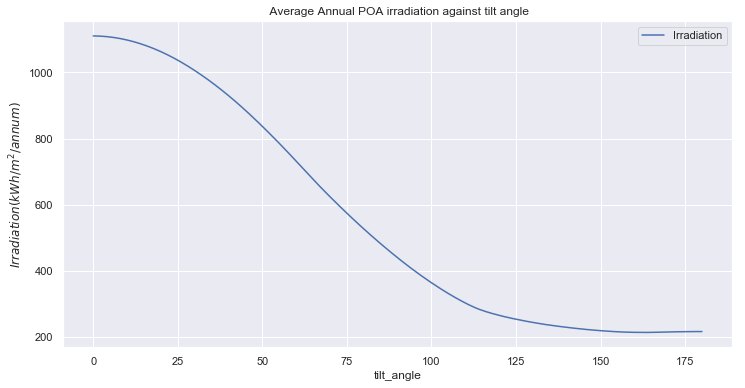

In [47]:
surtilt = np.arange(0, 181)
surazim = 0

beam_componet = poa_b(cleaned["GMT_time"],cleaned["Ext_Duffie_beckman_noor_diffuse4_BHI"][:,np.newaxis])
diff_componet = perez(cleaned["GMT_time"],cleaned["Ext_Duffie_beckman_noor_diffuse4_BHI"],cleaned["Horizontal Irradiance"],cleaned["Ext_Duffie_beckman"])
ground_ref = ground_reflection(cleaned["Horizontal Irradiance"][:,np.newaxis])
total_poa = beam_componet + diff_componet + ground_ref
total_poa = np.nan_to_num(total_poa)
total_poa = total_poa[~np.all(total_poa==0,axis=1)]
total_poa = total_poa.mean(0)/1000 * sun_hour_perday*365

value = total_poa.max()
index = list(total_poa).index(value)
print("Optimum surface tilt:{} degrees".format(surtilt[index]))
poa_tilt = pd.DataFrame({"tilt_angle":surtilt,"Irradiation":total_poa})
poa_tilt = poa_tilt.set_index("tilt_angle")
ax = poa_tilt.plot(title=" Average Annual POA irradiation against tilt angle",figsize=(12,6))
ax.set_ylabel("$Irradiation(kWh/m^2/annum)$")
plt.savefig("kampala_tilt.png")

print("Maximum Average annual POA irrdaition:{} kWh/m2/annum".format(value))

Optimum surface Azimuth:82 degrees
Maximum average annual plane of array Irradaition:1120.837277348251KWh/m2/annum


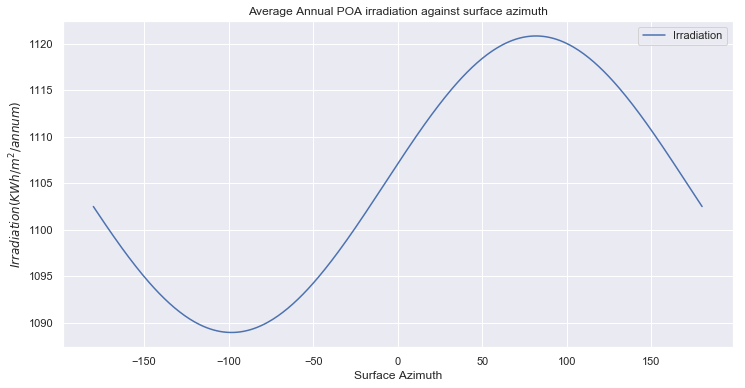

In [48]:

surtilt = 5
surazim = np.arange(-180,181)

beam_componet = poa_b(cleaned["GMT_time"],cleaned["Ext_Duffie_beckman_noor_diffuse4_BHI"][:,np.newaxis])
diff_componet = perez(cleaned["GMT_time"],cleaned["Ext_Duffie_beckman_noor_diffuse4_BHI"],cleaned["Horizontal Irradiance"],cleaned["Ext_Duffie_beckman"])
ground_ref = ground_reflection(cleaned["Horizontal Irradiance"][:,np.newaxis])
total_poa = beam_componet + diff_componet + ground_ref
total_poa = np.nan_to_num(total_poa)
total_poa = total_poa[~np.all(total_poa==0,axis=1)]
total_poa = total_poa.mean(0)/1000 * sun_hour_perday*365

value = total_poa.max()
index = list(total_poa).index(value)
print("Optimum surface Azimuth:{} degrees".format(surazim[index]))
poa_azimuth = pd.DataFrame({"Surface Azimuth":surazim,"Irradiation":total_poa})
poa_azimuth = poa_azimuth.set_index("Surface Azimuth")
ax = poa_azimuth.plot(title="Average Annual POA irradiation against surface azimuth",figsize=(12,6))
ax.set_ylabel("$Irradiation(KWh/m^2/annum)$")
plt.savefig("kampala_azimuth.png")

print("Maximum average annual plane of array Irradaition:{}KWh/m2/annum".format(value))

In [49]:
def poa_b(std_GMT_time, BHI):
    """this function calculates direct  irradiance on
     inclined plane"""

    aoi_radians = np.radians(angle_of_incidence(std_GMT_time))
    aoe_radians = np.radians(angle_of_elevation(std_GMT_time))
    POA_b = BHI*np.cos(aoi_radians)/np.sin(aoe_radians)
    beam = np.maximum(POA_b,0)
    return beam

In [50]:
def perez(std_GMT_time,BHI,DHI,G_ext):
    """this function calaculates diffuse componet
    on tilted collector"""
    global surtilt
    try:
        arr = np.array([[-0.008,0.588,-0.062,-0.060,0.072,-0.022],[0.130,0.683,-0.151,-0.019,0.066,-0.029],[0.330,0.487,-0.221,0.055,-0.064,-0.026],[0.568,0.187,-0.295,0.109,-0.152,-0.014],[0.873,-0.392,-0.362,0.226,-0.462,0.001],[1.132,-1.237,-0.412,0.288,-0.823,0.056],[1.060,-1.600,-0.359,0.264,-1.127,0.131],[0.678,-0.327,-0.250,0.156,-1.377,0.251]])
        labels = pd.cut([1.060, 1.20, 1.4, 1.8, 2.5, 3.0, 5, 7],
                    [1.000, 1.065, 1.230, 1.500, 1.950, 2.800, 4.500, 6.200, np.inf], right=False)
        df = pd.DataFrame(arr, index=labels.categories, columns=["F11", "F12", "F13", "F21", "F22", "F23"])

        aoe_radians = np.radians(angle_of_elevation(std_GMT_time))
        zenith_radians = np.pi - aoe_radians
        aoi_radians = np.radians(angle_of_incidence(std_GMT_time))

        air_mass = 1/np.sin(aoe_radians)
        G_ext = G_ext/np.sin(aoe_radians)
        delta = air_mass*(DHI/G_ext)
        dni = BHI/np.sin(aoe_radians)
        eps = ((DHI + dni)/DHI + 1.041 * zenith_radians**3)/(1 + 1.041 * zenith_radians**3)

        for x,y in enumerate(df.index):
            if eps in y:
                coef = df.iloc[x,:]
                break
        else:
            return np.nan

        F1 = np.maximum(0,(coef[0] + coef[1] * delta + coef[2] * zenith_radians))
        F2 = coef[3] + coef[4] * delta + zenith_radians * coef[5]

        a = np.maximum(0,np.cos(aoi_radians))
        b = np.maximum(np.cos(np.radians(85)), np.cos(zenith_radians))

        poa_d = DHI * (0.5 * (1 + np.cos(np.radians(surtilt))) * (1 - F1) + F1 * (a/b) + F2 * np.sin(np.radians(surtilt)))

        return np.maximum(poa_d, 0)
    except ZeroDivisionError:
        return 0

In [51]:
def noor2():
    global surtilt
    global surazim
    surtilt= np.arange(0,181)
    surazim = np.arange(-180,181)
    surtilt,surazim = np.meshgrid(surtilt,surazim)
    
    total_poa2 = []
    for d,f,g,m in zip(cleaned["GMT_time"],cleaned["Ext_Duffie_beckman_noor_diffuse4_BHI"],cleaned["Horizontal Irradiance"],cleaned["Ext_Duffie_beckman"]):
        dhi = g-f
        value_1 = poa_b(d,f)
        value_2 = perez(d,f,dhi,m)
        value3 = ground_reflection(g)
        total_poa2.append(np.nan_to_num(value_1 + value_2 + value3))
    total_poa2 = np.array(total_poa2)
    total_poa2 = total_poa2[~np.all(total_poa2==0,axis=(1,2))]
    return total_poa2.mean(0)/1000 * sun_hour_perday*365

In [52]:
total_poa = noor2()

In [53]:
total_poa

array([[1110.3829566 , 1109.27112479, 1107.92721356, ...,  216.80528002,
         216.8522183 ,  216.86831192],
       [1110.3829566 , 1109.21621098, 1107.81738112, ...,  216.80528002,
         216.8522183 ,  216.86831192],
       [1110.3829566 , 1109.16145499, 1107.70786897, ...,  216.80528002,
         216.8522183 ,  216.86831192],
       ...,
       [1110.3829566 , 1109.38136311, 1108.14776094, ...,  216.80528002,
         216.8522183 ,  216.86831192],
       [1110.3829566 , 1109.32618154, 1108.03732588, ...,  216.80528002,
         216.8522183 ,  216.86831192],
       [1110.3829566 , 1109.27112479, 1107.92721356, ...,  216.80528002,
         216.8522183 ,  216.86831192]])

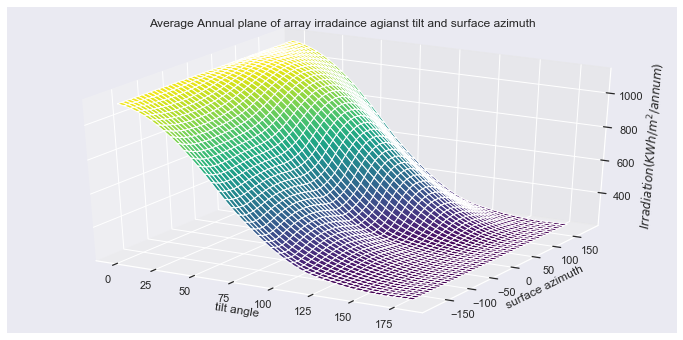

In [54]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111,projection="3d")

surtilt = np.arange(0,181)
surazim = np.arange(-180,181)
surtilt,surazim = np.meshgrid(surtilt,surazim)
ax.plot_surface(surtilt,surazim,total_poa,cmap = "viridis")
ax.set_title("Average Annual plane of array irradaince agianst tilt and surface azimuth")
ax.set_xlabel("tilt angle")
ax.set_ylabel("surface azimuth")
ax.set_zlabel("$Irradiation(KWh/m^2/annum)$")
plt.savefig("kampala_tilt_azim.png")

In [55]:
value = total_poa.max()

In [56]:
value

1125.802941320503

In [57]:
X,Y = np.where(total_poa==value)

In [58]:
surtilt[X[0],Y[0]],surazim[X[0],Y[0]]

(11, 82)

In [147]:
date = cleaned.index.date

In [148]:
date

array([datetime.date(2009, 4, 23), datetime.date(2009, 4, 23),
       datetime.date(2009, 4, 23), ..., datetime.date(2011, 12, 31),
       datetime.date(2011, 12, 31), datetime.date(2011, 12, 31)],
      dtype=object)

In [149]:
cleaned.insert(0,"date",date)

In [150]:
cleaned.date = cleaned.date.apply(lambda x:x.strftime("%d-%m-%Y"))

In [151]:
time = cleaned.index.time

In [152]:
cleaned.insert(1,"time",time)

In [153]:
cleaned.time = cleaned.time.apply(lambda x:x.strftime("%I:%M"))

In [154]:
cleaned

,date,time,Horizontal Irradiance,BHI,Diffuse Irradiance,GMT_time,Ext_Spencer,Ext_ASCE,Ext_Duffie_beckman,Ext_Spencer_noor_diffuse_BHI,...,Ext_Duffie_beckman_noor_diffuse4_BHI,Ext_Spencer_erbs_BHI,Ext_ASCE_erbs_BHI,Ext_Duffie_beckman_erbs_BHI,Ext_Spencer_orgil_hollands_BHI,Ext_ASCE_orgil_hollands_BHI,Ext_Duffie_beckman_orgil_hollands_BHI,Ext_Spencer_bolands_BHI,Ext_ASCE_bolands_BHI,Ext_Duffie_beckman_bolands_BHI
Date_time,,,,,,,,,,,,,,,,,,,,,
2009-04-23 00:00:00+03:00,23-04-2009,12:00,0,0,0,2009-04-22 21:00:00+00:00,0,0,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2009-04-23 19:00:00+03:00,23-04-2009,07:00,268,217,51,2009-04-23 16:00:00+00:00,0,0,0,243.200526,...,200.400484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,134.000000,134.000000
2009-04-23 20:00:00+03:00,23-04-2009,08:00,10,8,2,2009-04-23 17:00:00+00:00,0,0,0,9.074647,...,7.477630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000
2009-04-23 21:00:00+03:00,23-04-2009,09:00,0,0,0,2009-04-23 18:00:00+00:00,0,0,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2009-04-23 22:00:00+03:00,23-04-2009,10:00,0,0,0,2009-04-23 19:00:00+00:00,0,0,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2009-04-23 23:00:00+03:00,23-04-2009,11:00,0,0,0,2009-04-23 20:00:00+00:00,0,0,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2009-04-24 00:00:00+03:00,24-04-2009,12:00,0,0,0,2009-04-23 21:00:00+00:00,0,0,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2009-04-24 01:00:00+03:00,24-04-2009,01:00,0,0,0,2009-04-23 22:00:00+00:00,0,0,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2009-04-24 02:00:00+03:00,24-04-2009,02:00,0,0,0,2009-04-23 23:00:00+00:00,0,0,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [155]:
cleaned.to_csv("mbarara_combination.csv",index=False)